# Random Forest

In [1]:
install.packages('randomForest')
install.packages('caTools')


The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpMX44mj/downloaded_packages

The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpMX44mj/downloaded_packages


In [3]:
library('randomForest')
library('caTools')

In [4]:
df = iris

In [12]:
set.seed(2)

train_idx = sample(1:nrow(df), 0.7*nrow(df))
train_df = df[train_idx,]
test_df = df[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 105   5
[1] 45  5


In [13]:
model = randomForest(x=train_df[-5], y=train_df$Species, ntree=500)
model


Call:
 randomForest(x = train_df[-5], y = train_df$Species, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.81%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         36          0         0  0.00000000
versicolor      0         33         2  0.05714286
virginica       0          2        32  0.05882353

In [14]:
predictions = predict(model, newdata=test_df)
confusion_matrix = table(predictions, test_df$Species)
confusion_matrix

            
predictions  setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         14         4
  virginica       0          1        12

In [15]:
accuracy = mean(predictions == test_df$Species)
print(paste('Accuracy on test set:', round(accuracy*100,2), '%'))

[1] "Accuracy on test set: 88.89 %"


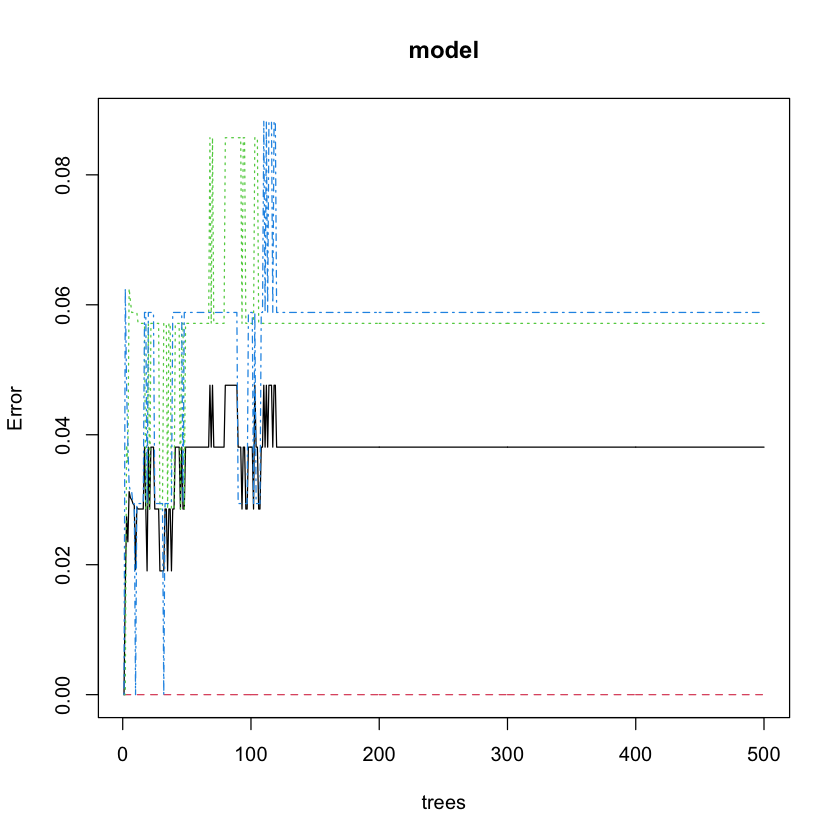

In [16]:
plot(model)

In [17]:
importance(model)

,MeanDecreaseGini
Sepal.Length,7.651226
Sepal.Width,1.129057
Petal.Length,34.141113
Petal.Width,26.388718


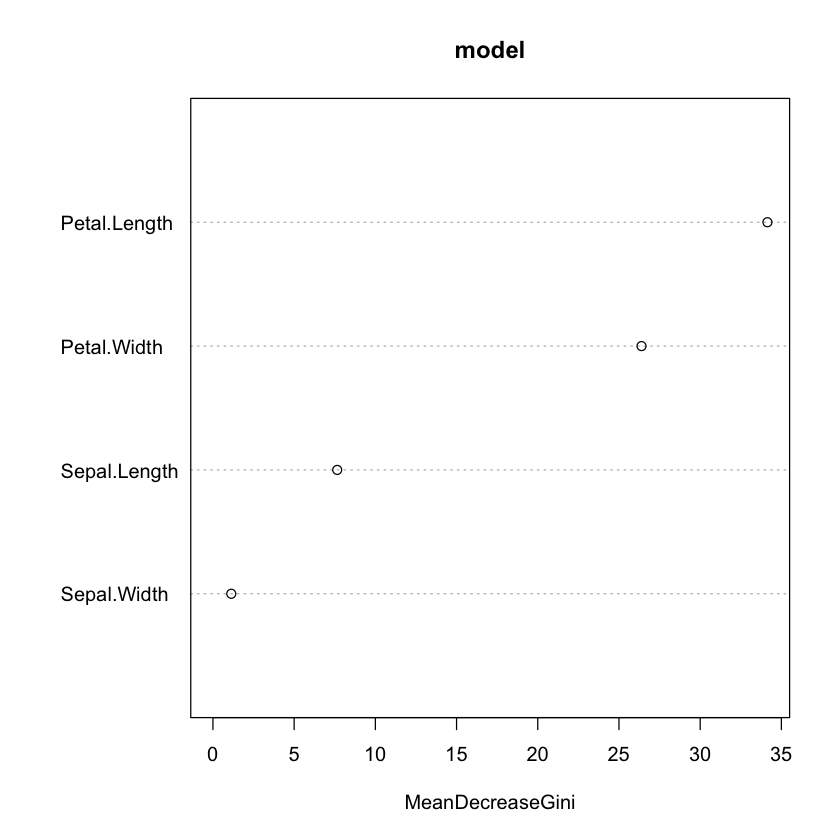

In [19]:
varImpPlot(model)